##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Writing your own callbacks

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/keras/custom_callback"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/custom_callback.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/keras-team/keras-io/blob/master/guides/writing_your_own_callbacks.py"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/keras/custom_callback.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

A callback is a powerful tool to customize the behavior of a Keras model during
training, evaluation, or inference. Examples include `tf.keras.callbacks.TensorBoard`
to visualize training progress and results with TensorBoard, or
`tf.keras.callbacks.ModelCheckpoint` to periodically save your model during training.

In this guide, you will learn what a Keras callback is, what it can do, and how you can
build your own. We provide a few demos of simple callback applications to get you
started.

## Setup

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
)

def get_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10))    
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    return model

def get_mnist():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    return x_train, y_train, x_test, y_test


In [2]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Predicting: end of batch {}; got log keys: {}".format(batch, keys))


In [3]:
x_train, y_train, x_test, y_test = get_mnist()
x_train = x_train[:1024]
y_train = y_train[:1024]
x_test = x_test[:512]
y_test = y_test[:512]

model = get_model()
model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=1,
    verbose=0,
    validation_split=0.5,
    callbacks=[CustomCallback()],
)

print('-'*100)
res = model.evaluate(
    x_test, y_test, batch_size=258, verbose=0, callbacks=[CustomCallback()]
)

print('-'*100)
res = model.predict(x_test, batch_size=256, callbacks=[CustomCallback()])

Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
    Training: start of batch 0; got log keys: []
    Training: end of batch 0; got log keys: ['loss', 'accuracy']
    Training: start of batch 1; got log keys: []
    Training: end of batch 1; got log keys: ['loss', 'accuracy']
Start testing; got log keys: []
    Evaluating: start of batch 0; got log keys: []
    Evaluating: end of batch 0; got log keys: ['loss', 'accuracy']
    Evaluating: start of batch 1; got log keys: []
    Evaluating: end of batch 1; got log keys: ['loss', 'accuracy']
Stop testing; got log keys: ['loss', 'accuracy']
End epoch 0 of training; got log keys: ['loss', 'accuracy', 'val_loss', 'val_accuracy']
Stop training; got log keys: ['loss', 'accuracy', 'val_loss', 'val_accuracy']
----------------------------------------------------------------------------------------------------
Start testing; got log keys: []
    Evaluating: start of batch 0; got log keys: []
    Evaluating: end of ba

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [71]:
class MyEarlyStopping(keras.callbacks.Callback):
    """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

    def __init__(self, patience=0):
        super(MyEarlyStopping, self).__init__()
        self.patience = patience
        self.best_weights = None
        self.best_epoch = -1

    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("val_loss")
        if np.less(current, self.best):
            self.best = current
            self.best_epoch = epoch
            self.wait = 0
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch {}.".format(self.best_epoch+1))
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


            
model = get_model()
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=30,
    verbose=0,
    validation_split=0.5,
    callbacks=[MyEarlyStopping(patience=5)],    
)

Restoring model weights from the end of the best epoch 19.
Epoch 00024: early stopping


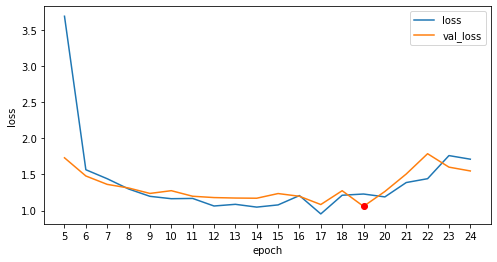

In [67]:
def plot_history(history, metrics_name='accuracy'):
    plt.figure(figsize=(8, 4))
    # 忽略前面几个epoch
    start_epoch = 5    
    metrics = history.history[metrics_name][start_epoch-1:]
    val_metrics = history.history['val_' + metrics_name][start_epoch-1:]
    epochs = [start_epoch + i for i in range(len(metrics))]
    lowest = np.argmin(val_metrics)
    
    plt.plot(epochs, metrics, label=metrics_name)
    plt.plot(epochs, val_metrics, label = 'val_' + metrics_name)
    plt.plot(lowest+start_epoch, val_metrics[lowest], 'ro')
    plt.xlabel('epoch')
    plt.ylabel(metrics_name)
    plt.xticks(epochs)
    plt.legend(loc='upper right')
    plt.show()

plot_history(history, metrics_name='loss')

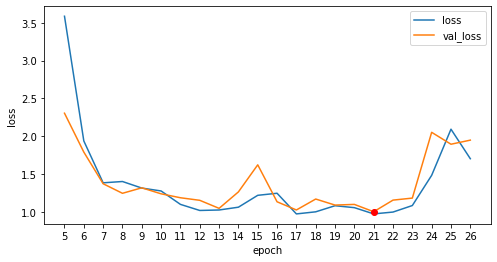

In [73]:
model = get_model()
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=30,
    verbose=0,
    validation_split=0.5,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],    
)
plot_history(history, metrics_name='loss')

## Keras callbacks overview

All callbacks subclass the `keras.callbacks.Callback` class, and
override a set of methods called at various stages of training, testing, and
predicting. Callbacks are useful to get a view on internal states and statistics of
the model during training.

You can pass a list of callbacks (as the keyword argument `callbacks`) to the following
model methods:

- `keras.Model.fit()`
- `keras.Model.evaluate()`
- `keras.Model.predict()`

## An overview of callback methods

### Global methods

#### `on_(train|test|predict)_begin(self, logs=None)`

Called at the beginning of `fit`/`evaluate`/`predict`.

#### `on_(train|test|predict)_end(self, logs=None)`

Called at the end of `fit`/`evaluate`/`predict`.

### Batch-level methods for training/testing/predicting

#### `on_(train|test|predict)_batch_begin(self, batch, logs=None)`

Called right before processing a batch during training/testing/predicting.

#### `on_(train|test|predict)_batch_end(self, batch, logs=None)`

Called at the end of training/testing/predicting a batch. Within this method, `logs` is
a dict containing the metrics results.

### Epoch-level methods (training only)

#### `on_epoch_begin(self, epoch, logs=None)`

Called at the beginning of an epoch during training.

#### `on_epoch_end(self, epoch, logs=None)`

Called at the end of an epoch during training.

## A basic example

Let's take a look at a concrete example. To get started, let's import tensorflow and
define a simple Sequential Keras model:

In [58]:
# Define the Keras model to add callbacks to
def get_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10))    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    return model


Then, load the MNIST data for training and testing from Keras datasets API:

In [66]:
# Load example MNIST data and pre-process it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Limit the data to 1000 samples
x_train = x_train[:1000]
y_train = y_train[:1024]
x_test = x_test[:512]
y_test = y_test[:512]

Now, define a simple custom callback that logs:

- When `fit`/`evaluate`/`predict` starts & ends
- When each epoch starts & ends
- When each training batch starts & ends
- When each evaluation (test) batch starts & ends
- When each inference (prediction) batch starts & ends

In [3]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("    Predicting: end of batch {}; got log keys: {}".format(batch, keys))


Let's try it out:

In [14]:
model = get_model()
model.fit(
    x_train,
    y_train,
    batch_size=256,
    steps_per_epoch=3,
    epochs=1,
    verbose=0,
    validation_split=0.5,
    callbacks=[CustomCallback()],
)

print('-'*100)
res = model.evaluate(
    x_test, y_test, batch_size=128, verbose=0, callbacks=[CustomCallback()]
)

print('-'*100)
res = model.predict(x_test, batch_size=128, callbacks=[CustomCallback()])

Starting training; got log keys: []
Start epoch 0 of training; got log keys: []
    Training: start of batch 0; got log keys: []
    Training: end of batch 0; got log keys: ['loss', 'accuracy']
    Training: start of batch 1; got log keys: []
    Training: end of batch 1; got log keys: ['loss', 'accuracy']
Start testing; got log keys: []
    Evaluating: start of batch 0; got log keys: []
    Evaluating: end of batch 0; got log keys: ['loss', 'accuracy']
    Evaluating: start of batch 1; got log keys: []
    Evaluating: end of batch 1; got log keys: ['loss', 'accuracy']
Stop testing; got log keys: ['loss', 'accuracy']
End epoch 0 of training; got log keys: ['loss', 'accuracy', 'val_loss', 'val_accuracy']
Stop training; got log keys: ['loss', 'accuracy', 'val_loss', 'val_accuracy']
----------------------------------------------------------------------------------------------------
Start testing; got log keys: []
    Evaluating: start of batch 0; got log keys: []
    Evaluating: end of ba

### Usage of `logs` dict
The `logs` dict contains the loss value, and all the metrics at the end of a batch or
epoch. Example includes the loss and mean absolute error.

In [44]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print("For batch {}, loss is {:7.2f}.".format(batch, logs["loss"]))

    def on_test_batch_end(self, batch, logs=None):
        print("For batch {}, loss is {:7.2f}.".format(batch, logs["loss"]))

    def on_epoch_end(self, epoch, logs=None):
        print(
            "The average loss for epoch {} is {:7.2f} "
            "and mean absolute error is {:7.2f}.".format(
                epoch, logs["loss"], logs["accuarcy"]
            )
        )


model = get_model()
model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=2,
    verbose=0,
    callbacks=[LossAndErrorPrintingCallback()],
)

print('-'*100)
res = model.evaluate(
    x_test,
    y_test,
    batch_size=128,
    verbose=0,
    callbacks=[LossAndErrorPrintingCallback()],
)

For batch 0, loss is   33.17.
For batch 1, loss is  469.01.
For batch 2, loss is  322.30.
For batch 3, loss is  244.07.
For batch 4, loss is  196.61.
For batch 5, loss is  164.93.
For batch 6, loss is  142.36.
For batch 7, loss is  128.22.


KeyError: 'accuarcy'

## Usage of `self.model` attribute

In addition to receiving log information when one of their methods is called,
callbacks have access to the model associated with the current round of
training/evaluation/inference: `self.model`.

Here are of few of the things you can do with `self.model` in a callback:

- Set `self.model.stop_training = True` to immediately interrupt training.
- Mutate hyperparameters of the optimizer (available as `self.model.optimizer`),
such as `self.model.optimizer.learning_rate`.
- Save the model at period intervals.
- Record the output of `model.predict()` on a few test samples at the end of each
epoch, to use as a sanity check during training.
- Extract visualizations of intermediate features at the end of each epoch, to monitor
what the model is learning over time.
- etc.

Let's see this in action in a couple of examples.

## Examples of Keras callback applications

### Early stopping at minimum loss

This first example shows the creation of a `Callback` that stops training when the
minimum of loss has been reached, by setting the attribute `self.model.stop_training`
(boolean). Optionally, you can provide an argument `patience` to specify how many
epochs we should wait before stopping after having reached a local minimum.

`tf.keras.callbacks.EarlyStopping` provides a more complete and general implementation.

In [29]:
a ={1:2}
a or {}

{1: 2}

In [43]:
import numpy as np


class EarlyStoppingAtMinLoss(keras.callbacks.Callback):
    """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

    def __init__(self, patience=0):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        self.best_weights = None

    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        print("\nvalidation loss for epoch {} is {:7.2f} ".format(epoch, logs["val_loss"]))        
        current = logs.get("val_loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))


model = get_model()
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    verbose=1,
    validation_split=0.5,
    callbacks=[EarlyStoppingAtMinLoss(patience=5)],
)

Epoch 1/30
1/8 [==>...........................] - ETA: 0s - loss: 19.9342 - mean_absolute_error: 3.6084
validation loss for epoch 0 is    5.23 
8/8 [==============================] - 0s 35ms/step - loss: 106.0871 - mean_absolute_error: 5.7187 - val_loss: 5.2297 - val_mean_absolute_error: 1.8439
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 4.1767 - mean_absolute_error: 1.7079
validation loss for epoch 1 is    5.62 
8/8 [==============================] - 0s 6ms/step - loss: 3.9583 - mean_absolute_error: 1.6035 - val_loss: 5.6182 - val_mean_absolute_error: 1.8858
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 4.2264 - mean_absolute_error: 1.7220
validation loss for epoch 2 is   13.85 
8/8 [==============================] - 0s 6ms/step - loss: 50.8966 - mean_absolute_error: 5.6353 - val_loss: 13.8500 - val_mean_absolute_error: 3.0218
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 10.9772 - mean_absolute_error: 2.6666
validation los

### Learning rate scheduling

In this example, we show how a custom Callback can be used to dynamically change the
learning rate of the optimizer during the course of training.

See `callbacks.LearningRateScheduler` for a more general implementations.

In [21]:
class CustomLearningRateScheduler(keras.callbacks.Callback):
    """Learning rate scheduler which sets the learning rate according to schedule.

  Arguments:
      schedule: a function that takes an epoch index
          (integer, indexed from 0) and current learning rate
          as inputs and returns a new learning rate as output (float).
  """

    def __init__(self, schedule):
        super(CustomLearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, scheduled_lr))


LR_SCHEDULE = [
    # (epoch to start, learning rate) tuples
    (3, 0.05),
    (6, 0.01),
    (9, 0.005),
    (12, 0.001),
]


def lr_schedule(epoch, lr):
    """Helper function to retrieve the scheduled learning rate based on epoch."""
    if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
        return lr
    for i in range(len(LR_SCHEDULE)):
        if epoch == LR_SCHEDULE[i][0]:
            return LR_SCHEDULE[i][1]
    return lr


model = get_model()
model.fit(
    x_train,
    y_train,
    batch_size=64,
    steps_per_epoch=5,
    epochs=15,
    verbose=0,
    callbacks=[
        LossAndErrorPrintingCallback(),
        CustomLearningRateScheduler(lr_schedule),
    ],
)


Epoch 00000: Learning rate is 0.1000.
For batch 0, loss is   35.09.
For batch 1, loss is  441.32.
For batch 2, loss is  302.06.
For batch 3, loss is  229.20.
For batch 4, loss is  185.32.
The average loss for epoch 0 is  185.32 and mean absolute error is    8.37.

Epoch 00001: Learning rate is 0.1000.
For batch 0, loss is    6.01.
For batch 1, loss is    6.24.
For batch 2, loss is    5.69.
For batch 3, loss is    5.84.
For batch 4, loss is    5.45.
The average loss for epoch 1 is    5.45 and mean absolute error is    1.89.

Epoch 00002: Learning rate is 0.1000.
For batch 0, loss is    5.83.
For batch 1, loss is    5.75.
For batch 2, loss is    5.11.
For batch 3, loss is    5.59.
For batch 4, loss is    5.62.
The average loss for epoch 2 is    5.62 and mean absolute error is    1.91.

Epoch 00003: Learning rate is 0.0500.
For batch 0, loss is    5.93.
For batch 1, loss is    4.46.
For batch 2, loss is    4.17.
For batch 3, loss is    3.86.
For batch 4, loss is    3.85.
The average loss

### Built-in Keras callbacks
Be sure to check out the existing Keras callbacks by
reading the [API docs](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/).
Applications include logging to CSV, saving
the model, visualizing metrics in TensorBoard, and a lot more!